In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kaggle_airbnb.preprocess import process_non, process_non_numeric_data, normalize
import sklearn
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [3]:
%matplotlib inline

In [8]:
df = pd.read_csv("../data/train.csv")
data_df = df.drop(columns=["id"])
feature_df = df.drop(columns=["id", "Decision"])

In [9]:
data_df = process_non(data_df)
data_df = process_non_numeric_data(data_df)
transformed_feature_df = data_df.drop(columns=["Decision"])
transformed_feature_df = normalize(transformed_feature_df)

In [10]:
print (transformed_feature_df.describe())

       Host_response_time  Host_is_superhost  Host_has_profile_pic  \
count        7.471000e+03       7.471000e+03          7.471000e+03   
mean         4.421722e-16       5.267727e-16          2.563091e-16   
std          1.000000e+00       1.000000e+00          1.000000e+00   
min         -2.597318e+00      -3.589561e+00         -8.617755e+00   
25%          4.649084e-01      -1.498682e+00          1.198778e-01   
50%          4.649084e-01       5.921964e-01          1.198778e-01   
75%          4.649084e-01       5.921964e-01          1.198778e-01   
max          4.649084e-01       5.921964e-01          1.198778e-01   

       Host_identity_verified  Neighbourhood  Property_type     Room_type  \
count            7.471000e+03   7.471000e+03   7.471000e+03  7.471000e+03   
mean             3.101373e-17   1.648680e-14  -1.482372e-16 -7.837096e-16   
std              1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00   
min             -3.774639e+00  -3.077456e+00  -1.631614e+00 -

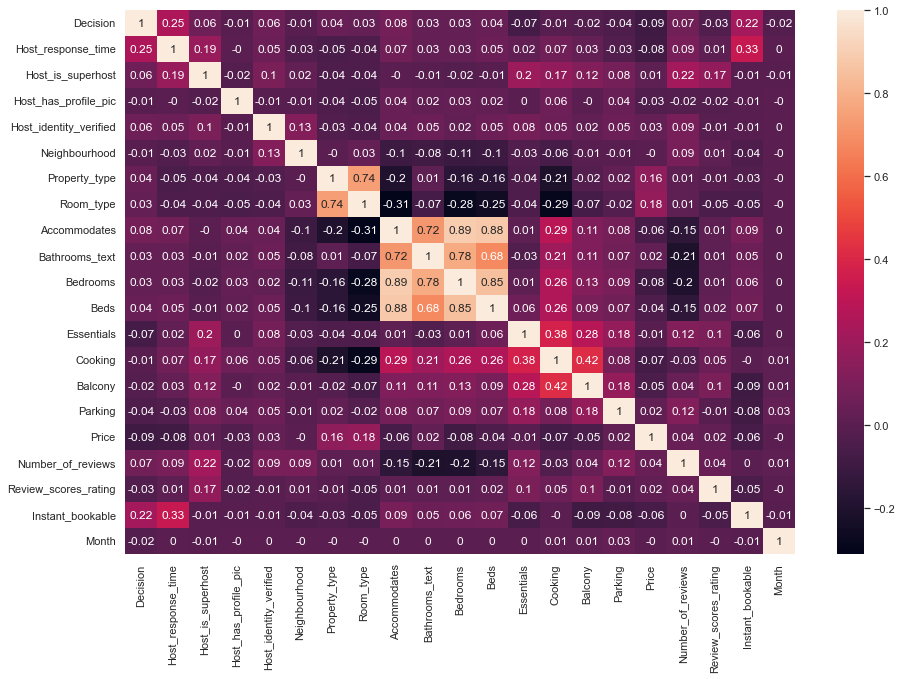

In [16]:
# Correlation matrix shows that each individual feature doesn't have strong correlation with the target variable. Some shows the positive correlation, the others shows negative correlation. We also observe there might be multicolinearity between some features like "Bathroom_text", "Bedrooms", and "Beds".
correlation_matrix = data_df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot=True)
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

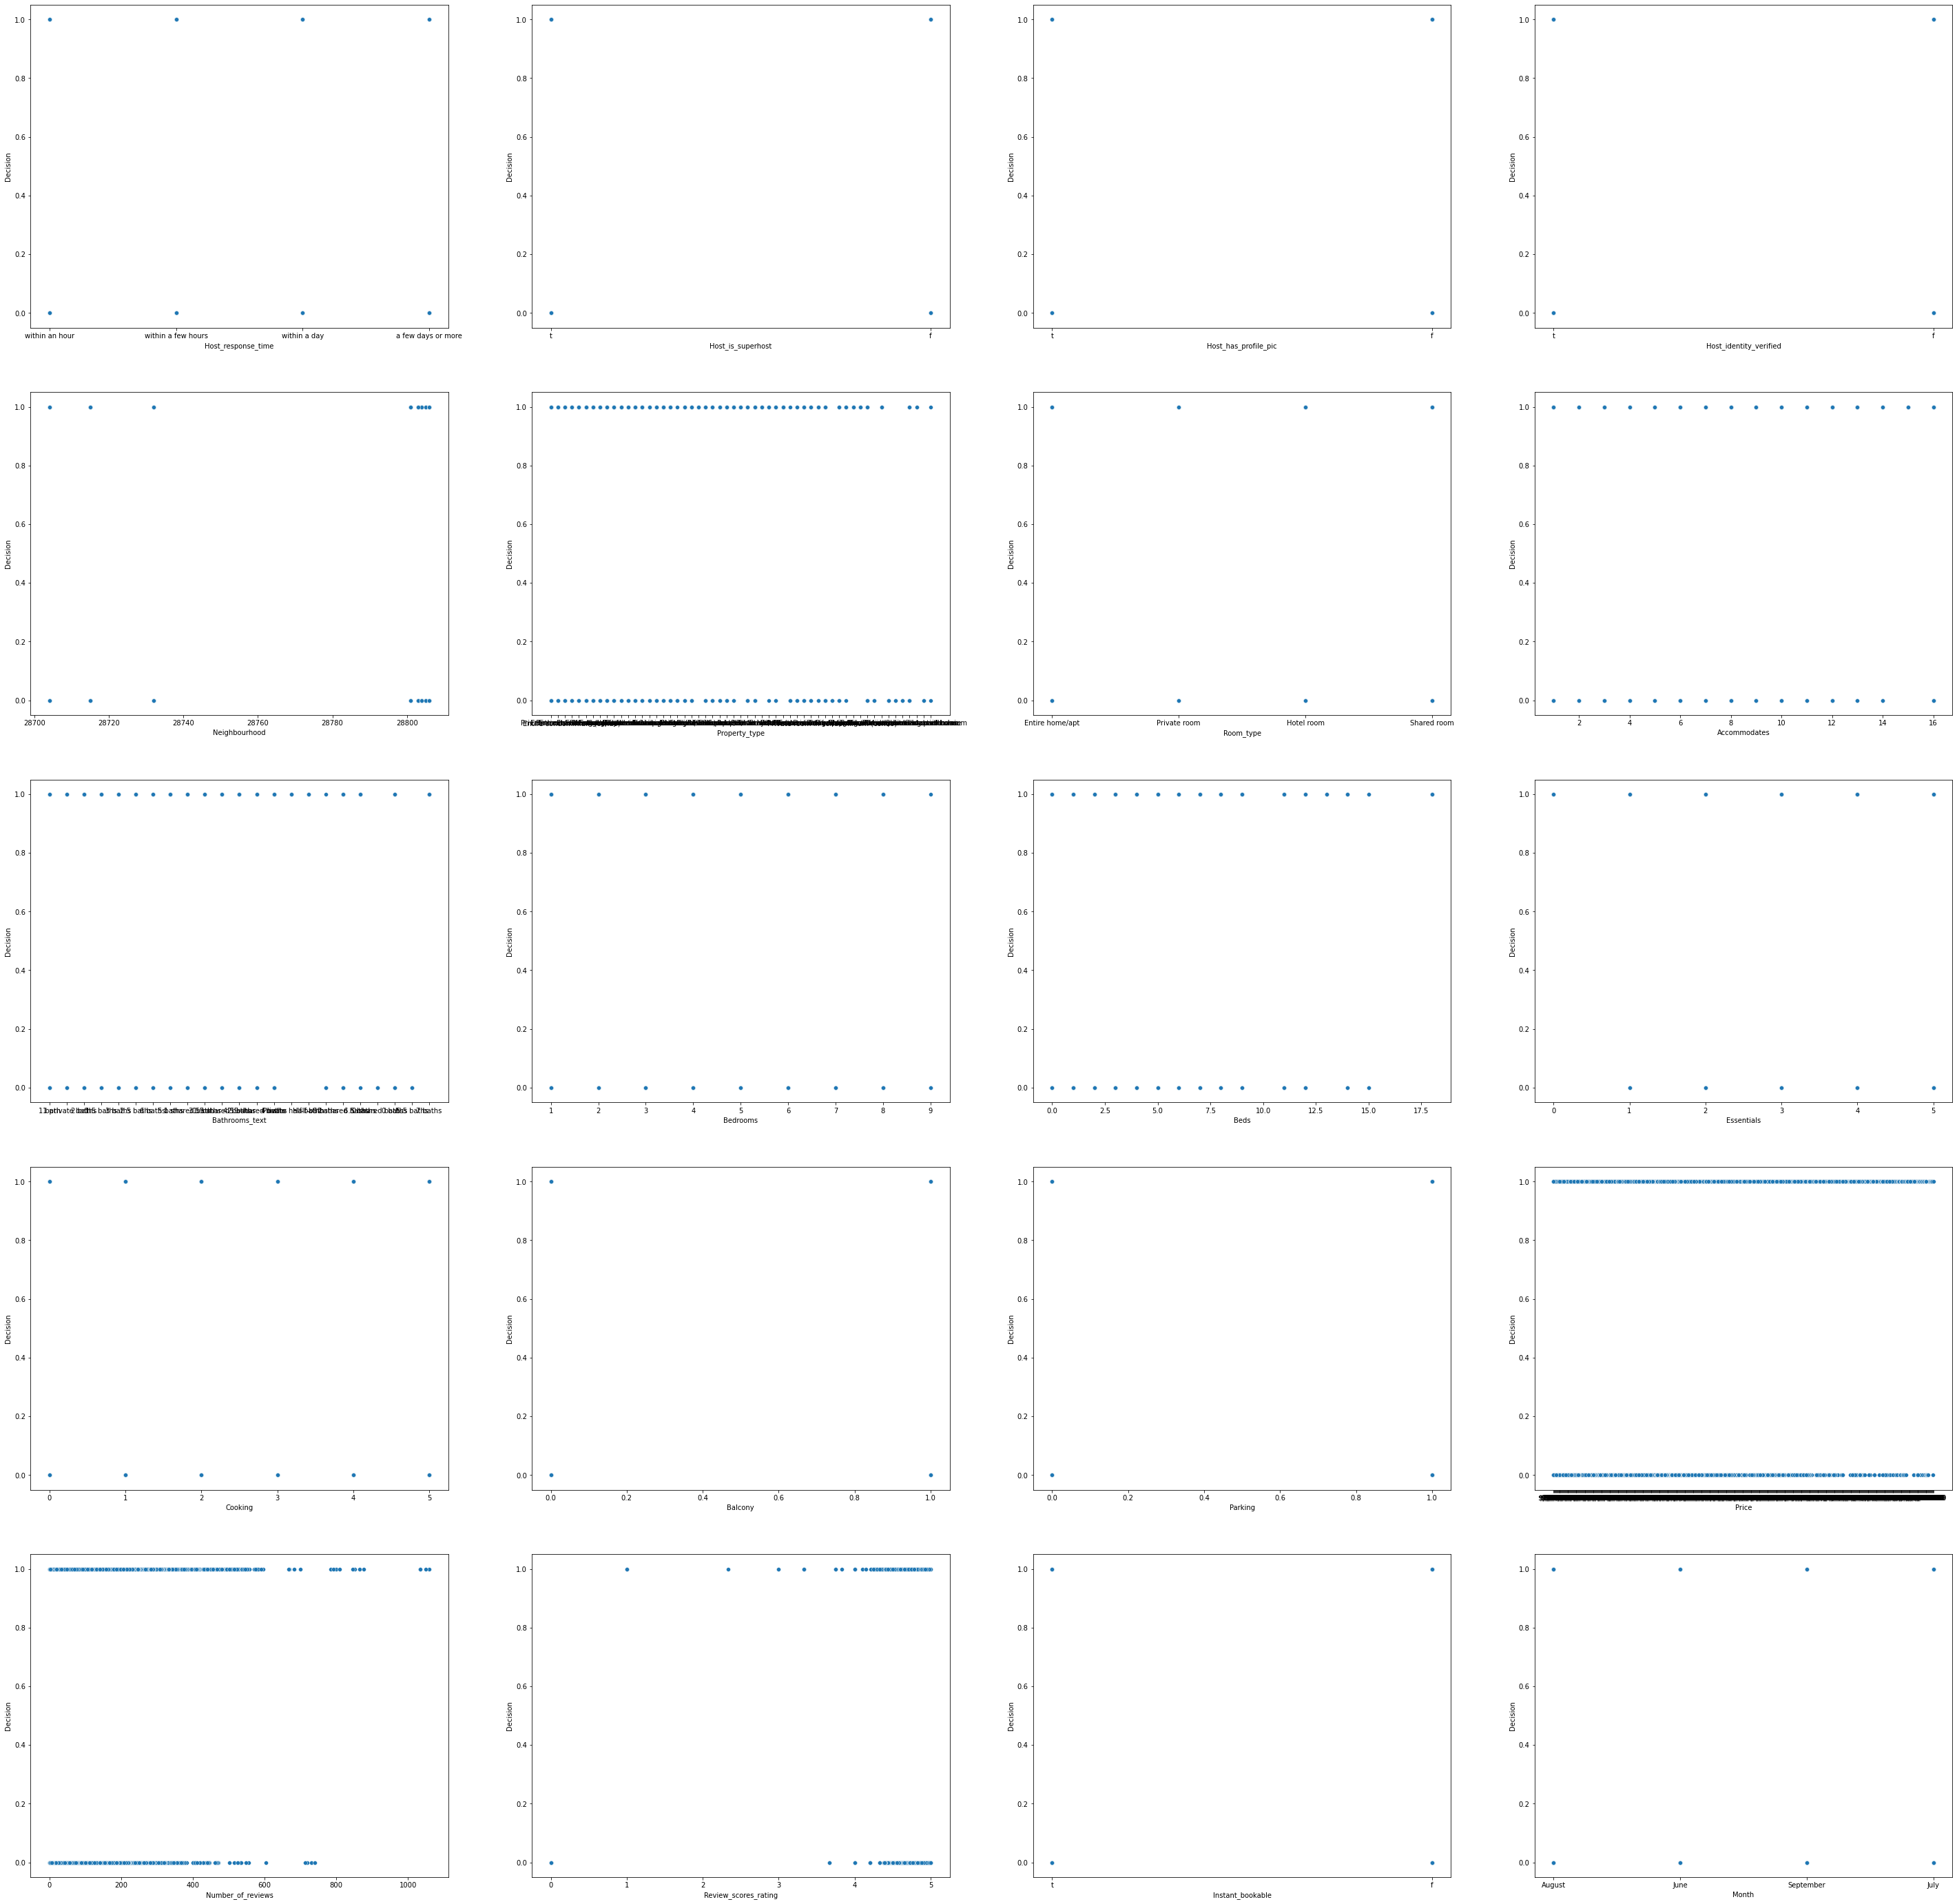

In [7]:

# Initialise the subplot function using number of rows and columns
figure, axes = plt.subplots(5, 4)
figure.set_figheight(50)
figure.set_figwidth(50)

for ax, col_name in zip(axes.flatten(), feature_df):
    sns.scatterplot(x=col_name, y="Decision", data=df, ax=ax)

Feature: 0, Score: 0.15614
Feature: 1, Score: 0.00644
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01830
Feature: 4, Score: 0.04577
Feature: 5, Score: 0.05688
Feature: 6, Score: 0.01564
Feature: 7, Score: 0.04410
Feature: 8, Score: 0.02860
Feature: 9, Score: 0.03240
Feature: 10, Score: 0.03358
Feature: 11, Score: 0.01008
Feature: 12, Score: 0.04597
Feature: 13, Score: 0.01574
Feature: 14, Score: 0.00237
Feature: 15, Score: 0.13989
Feature: 16, Score: 0.16925
Feature: 17, Score: 0.08250
Feature: 18, Score: 0.04444
Feature: 19, Score: 0.05190


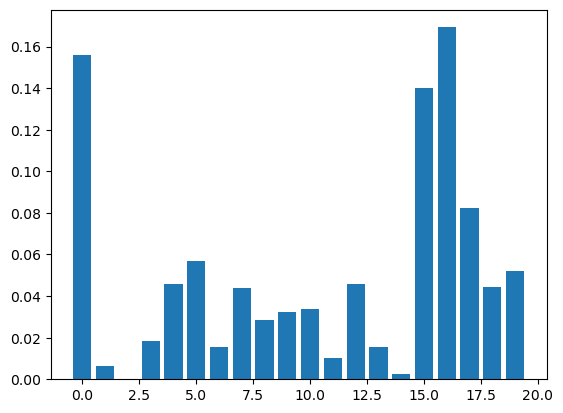

In [5]:
# Feature Importance
# decision tree for feature importance on a regression problem

# define the model
model1 = DecisionTreeRegressor()
# fit the model
model1.fit(transformed_feature_df, data_df["Decision"])
# get importance
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.08896
Feature: 1, Score: 0.01519
Feature: 2, Score: 0.00014
Feature: 3, Score: 0.01527
Feature: 4, Score: 0.05532
Feature: 5, Score: 0.06747
Feature: 6, Score: 0.00620
Feature: 7, Score: 0.04142
Feature: 8, Score: 0.02985
Feature: 9, Score: 0.02750
Feature: 10, Score: 0.03822
Feature: 11, Score: 0.01029
Feature: 12, Score: 0.04319
Feature: 13, Score: 0.01081
Feature: 14, Score: 0.00317
Feature: 15, Score: 0.17124
Feature: 16, Score: 0.19109
Feature: 17, Score: 0.09755
Feature: 18, Score: 0.02317
Feature: 19, Score: 0.06394


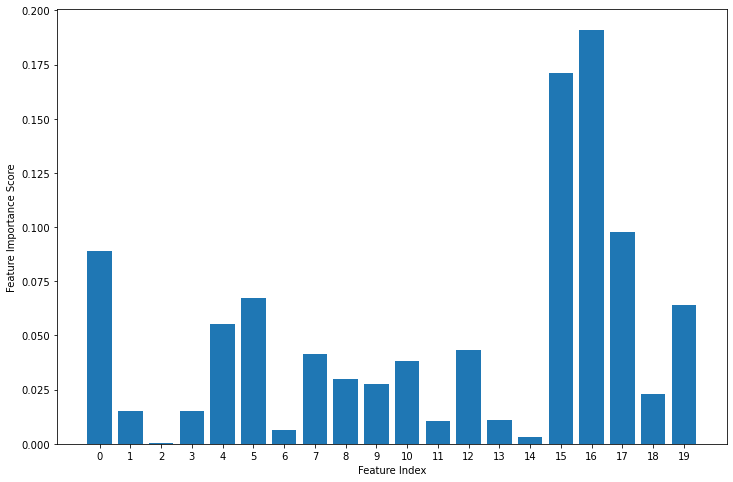

In [13]:

# decision tree for feature importance on a classification problem

# define the model
model2 = DecisionTreeClassifier()
# fit the model
model2.fit(transformed_feature_df, data_df["Decision"])
# get importance
importance = model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
figure(figsize = (12, 8))
pyplot.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance Score')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])    # changing x scale by own
pyplot.show()

Feature: 0, Score: 0.12841
Feature: 1, Score: 0.01482
Feature: 2, Score: 0.00124
Feature: 3, Score: 0.01847
Feature: 4, Score: 0.05741
Feature: 5, Score: 0.06631
Feature: 6, Score: 0.00948
Feature: 7, Score: 0.04609
Feature: 8, Score: 0.03553
Feature: 9, Score: 0.04037
Feature: 10, Score: 0.03706
Feature: 11, Score: 0.01661
Feature: 12, Score: 0.04252
Feature: 13, Score: 0.01725
Feature: 14, Score: 0.00486
Feature: 15, Score: 0.13527
Feature: 16, Score: 0.14339
Feature: 17, Score: 0.09475
Feature: 18, Score: 0.03669
Feature: 19, Score: 0.05346


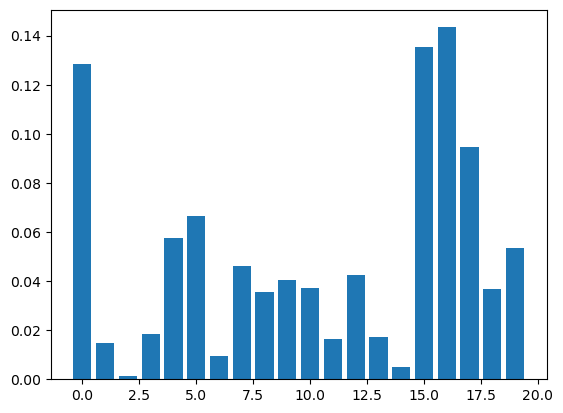

In [9]:
# random forest for feature importance on a classification problem

# define the model
model3 = RandomForestClassifier()
# fit the model
model3.fit(transformed_feature_df, data_df["Decision"])
# get importance
importance = model3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()